In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText
from math import acos, sqrt
#import os

Welcome to JupyROOT 6.22/06


# Read in data

In [2]:
# parameters
A = 1#0.9
B = 0#0.07
T_N = 0.53
T_NN = 0.44

### ADD THESE TO ERRORS TOO???

In [3]:
# Normal
sz = 9
pp = np.zeros(sz-2)
pn = np.zeros(sz-2)
p = np.zeros(sz-2)
n_sig = np.zeros(sz-2)
n_bkg = np.zeros(sz-2)
pp_err_stat = np.zeros(sz-2)
pn_err_stat = np.zeros(sz-2)
p_err_stat = np.zeros(sz-2)
pmiss = np.array([0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c.root"
f = ROOT.TFile.Open(title,"READ")
h_p = f.Get("pmiss_p")
h_pp = f.Get("pmiss_pp_corr")
h_pn = f.Get("pmiss_pn_corr")
h_n_sig = f.Get("n_signal")
h_n_bkg = f.Get("n_background")

for i in range(sz-2):
    p[i] = h_p.GetBinContent(i+1) * T_N
    p_err_stat[i] = ( h_p.GetBinError(i+1) ) * 0.53
    pp[i] = ( A*h_pp.GetBinContent(i+1) + B*h_pn.GetBinContent(i+1) ) * T_NN
    pp_err_stat[i] = h_pp.GetBinError(i+1)
    pn[i] = ( A*h_pn.GetBinContent(i+1) + B*h_pp.GetBinContent(i+1) ) * T_NN
    pn_err_stat[i] = h_pn.GetBinError(i+1)
    n_sig[i] = h_n_sig.GetBinContent(i+1)
    n_bkg[i] = h_n_bkg.GetBinContent(i+1)

In [4]:
print(n_sig)
print(n_bkg)
print(np.divide(n_sig,n_bkg))

e_s = 0.85
e_b = 0.10
#n_sig = 321
#n_bkg = 678


[110. 116. 154. 117.  70.  50.  38.]
[469. 380. 318. 242. 179. 111.  97.]
[0.23454158 0.30526316 0.48427673 0.48347107 0.39106145 0.45045045
 0.39175258]


In [5]:
# Alternative neff model
pp_altneff = np.zeros(sz-2)
pn_altneff = np.zeros(sz-2)
p_altneff = np.zeros(sz-2)
pp_err_altneff = np.zeros(sz-2)
pn_err_altneff = np.zeros(sz-2)
p_err_altneff = np.zeros(sz-2)

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_altneff.root"
f = ROOT.TFile.Open(title,"READ")
h_p_altneff = f.Get("pmiss_p")
h_pp_altneff = f.Get("pmiss_pp_corr")
h_pn_altneff = f.Get("pmiss_pn_corr")

for i in range(sz-2):
    p_altneff[i] = h_p_altneff.GetBinContent(i+1) * T_N
    p_err_altneff[i] = h_p_altneff.GetBinError(i+1)
    pp_altneff[i] = ( A*h_pp_altneff.GetBinContent(i+1) + B*h_pn_altneff.GetBinContent(i+1) ) * T_NN
    pp_err_altneff[i] = h_pp_altneff.GetBinError(i+1)
    pn_altneff[i] = ( A*h_pn_altneff.GetBinContent(i+1) + B*h_pp_altneff.GetBinContent(i+1) ) * T_NN
    pn_err_altneff[i] = h_pn_altneff.GetBinError(i+1)

In [6]:
# Veto MVA value high
pp_hi = np.zeros(sz-2)
pn_hi = np.zeros(sz-2)
p_hi = np.zeros(sz-2)
pp_err_hi = np.zeros(sz-2)
pn_err_hi = np.zeros(sz-2)
p_err_hi = np.zeros(sz-2)

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_highmva.root"
f = ROOT.TFile.Open(title,"READ")
h_p_hi = f.Get("pmiss_p")
h_pp_hi = f.Get("pmiss_pp_corr")
h_pn_hi = f.Get("pmiss_pn_corr")

for i in range(sz-2):
    p_hi[i] = h_p_hi.GetBinContent(i+1) * T_N
    p_err_hi[i] = h_p_hi.GetBinError(i+1)
    pp_hi[i] = ( A*h_pp_hi.GetBinContent(i+1) + B*h_pn_hi.GetBinContent(i+1) ) * T_NN
    pp_err_hi[i] = h_pp_hi.GetBinError(i+1)
    pn_hi[i] = ( A*h_pn_hi.GetBinContent(i+1) + B*h_pp_hi.GetBinContent(i+1) ) * T_NN
    pn_err_hi[i] = h_pn_hi.GetBinError(i+1)

# Veto MVA value low
pp_lo = np.zeros(sz-2)
pn_lo = np.zeros(sz-2)
p_lo = np.zeros(sz-2)
pp_err_lo = np.zeros(sz-2)
pn_err_lo = np.zeros(sz-2)
p_err_lo = np.zeros(sz-2)

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_lowmva.root"
f = ROOT.TFile.Open(title,"READ")
h_p_lo = f.Get("pmiss_p")
h_pp_lo = f.Get("pmiss_pp_corr")
h_pn_lo = f.Get("pmiss_pn_corr")

for i in range(sz-2):
    p_lo[i] = h_p_lo.GetBinContent(i+1) * T_N
    p_err_lo[i] = h_p_lo.GetBinError(i+1)
    pp_lo[i] = ( A*h_pp_lo.GetBinContent(i+1) + B*h_pn_lo.GetBinContent(i+1) ) * T_NN
    pp_err_lo[i] = h_pp_lo.GetBinError(i+1)
    pn_lo[i] = ( A*h_pn_lo.GetBinContent(i+1) + B*h_pp_lo.GetBinContent(i+1) ) * T_NN
    pn_err_lo[i] = h_pn_lo.GetBinError(i+1)

In [7]:
# peff linear - should be same as default
pp_lin = np.zeros(sz-2)
pn_lin = np.zeros(sz-2)
p_lin = np.zeros(sz-2)
pp_err_lin = np.zeros(sz-2)
pn_err_lin = np.zeros(sz-2)
p_err_lin = np.zeros(sz-2)

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_pefflinear.root"
f = ROOT.TFile.Open(title,"READ")
h_p_lin = f.Get("pmiss_p")
h_pp_lin = f.Get("pmiss_pp_corr")
h_pn_lin = f.Get("pmiss_pn_corr")

for i in range(sz-2):
    p_lin[i] = h_p_lin.GetBinContent(i+1) * T_N
    p_err_lin[i] = h_p_lin.GetBinError(i+1)
    pp_lin[i] = ( A*h_pp_lin.GetBinContent(i+1) + B*h_pn_lin[i] ) * T_NN
    pp_err_lin[i] = h_pp_lin.GetBinError(i+1)
    pn_lin[i] = ( A*h_pn_lin.GetBinContent(i+1) + B*h_pp_lin[i] ) * T_NN
    pn_err_lin[i] = h_pn_lin.GetBinError(i+1)

"""# peff quadratic
pp_quad = np.zeros(sz-2)
pn_quad = np.zeros(sz-2)
p_quad = np.zeros(sz-2)
pp_err_quad = np.zeros(sz-2)
pn_err_quad = np.zeros(sz-2)
p_err_quad = np.zeros(sz-2)

title = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_peffquad.root"
f = ROOT.TFile.Open(title,"READ")
h_p_quad = f.Get("pmiss_p")
h_pp_quad = f.Get("pmiss_pp_corr")
h_pn_quad = f.Get("pmiss_pn_corr")

for i in range(sz-2):
    p_quad[i] = h_p_quad.GetBinContent(i+1)
    p_err_quad[i] = h_p_quad.GetBinError(i+1)
    pp_quad[i] = h_pp_quad.GetBinContent(i+1)
    pp_err_quad[i] = h_pp_quad.GetBinError(i+1)
    pn_quad[i] = h_pn_quad.GetBinContent(i+1)
    pn_err_quad[i] = h_pn_quad.GetBinError(i+1)"""

'# peff quadratic\npp_quad = np.zeros(sz-2)\npn_quad = np.zeros(sz-2)\np_quad = np.zeros(sz-2)\npp_err_quad = np.zeros(sz-2)\npn_err_quad = np.zeros(sz-2)\np_err_quad = np.zeros(sz-2)\n\ntitle = "/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/ts_c_peffquad.root"\nf = ROOT.TFile.Open(title,"READ")\nh_p_quad = f.Get("pmiss_p")\nh_pp_quad = f.Get("pmiss_pp_corr")\nh_pn_quad = f.Get("pmiss_pn_corr")\n\nfor i in range(sz-2):\n    p_quad[i] = h_p_quad.GetBinContent(i+1)\n    p_err_quad[i] = h_p_quad.GetBinError(i+1)\n    pp_quad[i] = h_pp_quad.GetBinContent(i+1)\n    pp_err_quad[i] = h_pp_quad.GetBinError(i+1)\n    pn_quad[i] = h_pn_quad.GetBinContent(i+1)\n    pn_err_quad[i] = h_pn_quad.GetBinError(i+1)'

<ErrorbarContainer object of 3 artists>

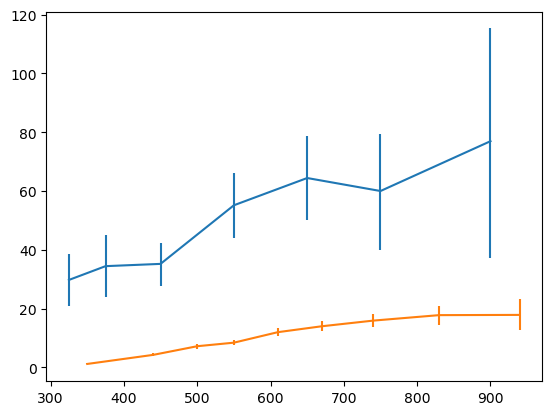

In [26]:
# pn/p
k_pn_p_x = np.array([325, 375, 450, 550, 650, 750, 900])
k_pn_p = np.array([29.714811, 34.40959, 35.18293, 55.120448, 64.399, 59.9780, 76.93082434430971])
k_pn_p_hi = np.array([38.4540498, 44.92723, 42.2165389436, 66.1398674878, 78.659810489, 79.36223677, 115.2858648]) - k_pn_p
k_pn_p_lo = k_pn_p - np.array([20.73014389, 23.7929272369, 27.6748287, 43.9397056, 49.985230, 39.8461, 37.11060])
k_pn_p_err = np.stack((k_pn_p_lo,k_pn_p_hi))

# pp/p

k_pp_p_x = np.array([350,440,500,550,610,670,740,830,940])
k_pp_p = np.array([1.13254, 4.22165, 7.1649, 8.3710, 11.94593, 13.9568575, 15.8771, 17.7433, 17.822361603772066])
k_pp_p_hi = np.array([1.3056600, 4.696936, 8.078596, 9.2310, 13.2908, 15.5973, 18.0616, 21.00844, 23.1667368]) - k_pp_p
k_pp_p_lo = k_pp_p - np.array([0.95228, 3.74420, 6.2426185, 7.45739, 10.59489, 12.21441, 13.6500, 14.397966, 12.600])

# plots
plt.errorbar(k_pn_p_x, k_pn_p, yerr=np.stack((k_pn_p_lo,k_pn_p_hi)))
plt.errorbar(k_pp_p_x, k_pp_p, yerr=np.stack((k_pp_p_lo,k_pp_p_hi)))

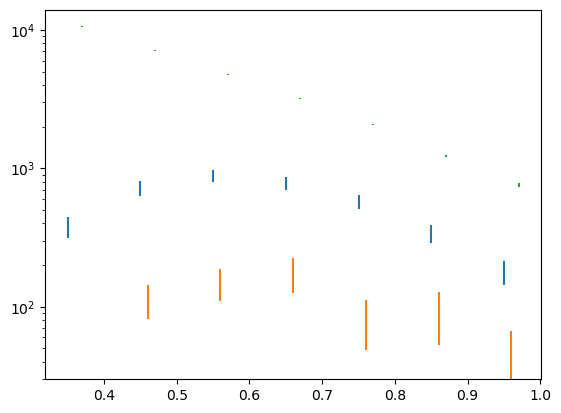

In [27]:
plt.errorbar(pmiss, pp, yerr=pp_err_stat, ls='none')
plt.errorbar(pmiss+0.01, pn, yerr=pn_err_stat, ls='none')
plt.errorbar(pmiss+0.02, p, yerr=p_err_stat, ls='none')
plt.yscale("log")

# pn/p and pp/p - errors and results

<ErrorbarContainer object of 3 artists>

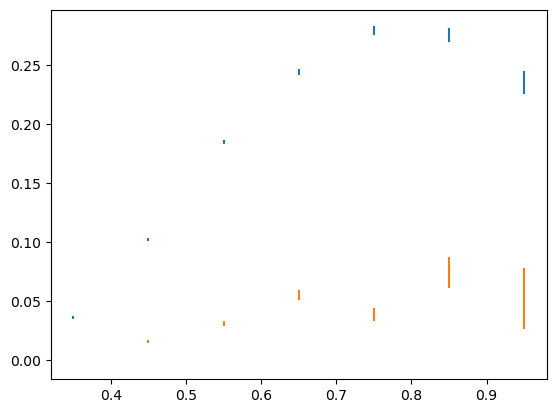

In [28]:
# statistical error
pp_p_err_stat = np.multiply( np.divide(pp,p), np.square(np.divide(pp_err_stat,pp)) + np.square(np.divide(p_err_stat,p)) )
pn_p_err_stat = np.multiply( np.divide(pn,p), np.square(np.divide(pn_err_stat,pn)) + np.square(np.divide(p_err_stat,p)) )

plt.errorbar(pmiss, np.divide(pp,p), yerr=pp_p_err_stat, ls='none')
plt.errorbar(pmiss, np.divide(pn,p), yerr=pn_p_err_stat, ls='none')

[3.34402647e-05 1.05881654e-04 4.93831781e-04 9.75312548e-04
 1.05615291e-03 1.75171100e-03 1.38777878e-16]


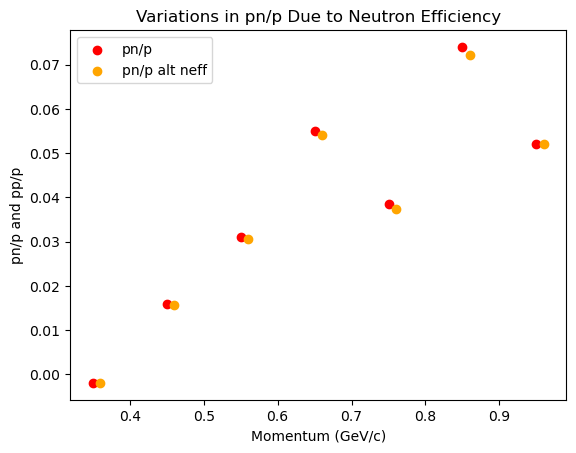

In [29]:
# pn/p and pp/p - error due to neff
plt.title("Variations in pn/p Due to Neutron Efficiency")
plt.scatter(pmiss, np.divide(pn,p), c='red')
plt.scatter(pmiss+0.01, np.divide(pn_altneff,p_altneff), c='orange')
pn_p_err_neff = abs( np.divide(pn,p) - np.divide(pn_altneff,p_altneff) )
plt.legend(["pn/p","pn/p alt neff","pp/p","pp/p alt neff"])
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
print(pn_p_err_neff)
#print(pp_p_err_neff)

[False False False False False False False]


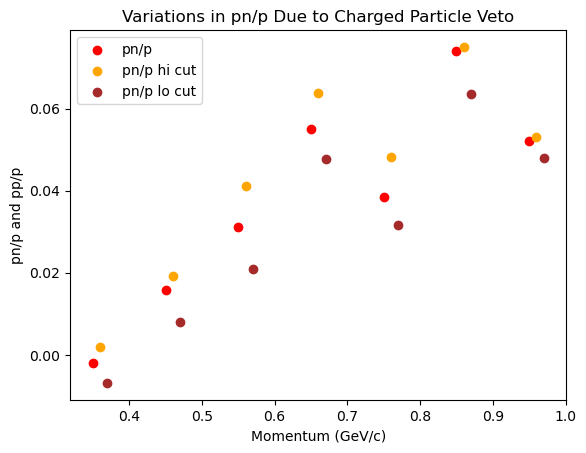

In [30]:
# pn/p and pp/p - error due to MLP
plt.title("Variations in pn/p Due to Charged Particle Veto")
plt.scatter(pmiss, np.divide(pn,p), c='red')
plt.scatter(pmiss+0.01, np.divide(pn_hi,p_hi), c='orange')
plt.scatter(pmiss+0.02, np.divide(pn_lo,p_lo), c='brown')
print(pn_hi==pn_lo)
#plt.scatter(pmiss, np.divide(pp,p), c='blue')
#plt.scatter(pmiss+0.01, np.divide(pp_hi,p_hi), c='green')
#plt.scatter(pmiss+0.02, np.divide(pp_lo,p_lo), c='skyblue')
pn_p_err_himva = abs( np.divide(pn,p) - np.divide(pn_hi,p_hi) )
#pp_p_err_himva = abs( np.divide(pp,p) - np.divide(pp_hi,p_hi) )
pn_p_err_lomva = abs( np.divide(pn,p) - np.divide(pn_lo,p_lo) )
#pp_p_err_lomva = abs( np.divide(pp,p) - np.divide(pp_lo,p_lo) )
plt.legend(["pn/p","pn/p hi cut","pn/p lo cut"])
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
# find errors
pn_p_err_mlp = np.maximum( np.divide(pn_hi,p_hi)-np.divide(pn_lo,p_lo), np.maximum( np.divide(pn_hi,p_hi)-np.divide(pn,p), np.divide(pn,p)-np.divide(pn_lo,p_lo) ) )
#pp_p_err_mlp = np.maximum( np.divide(pp_hi,p_hi)-np.divide(pp_lo,p_lo), np.maximum( np.divide(pp_hi,p_hi)-np.divide(pp,p), np.divide(pp,p)-np.divide(pp_lo,p_lo) ) )

[ True  True  True  True  True  True  True]


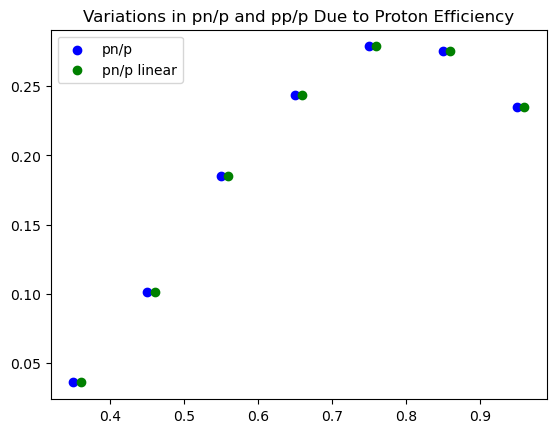

In [31]:
# pn/p and pp/p - error due to peff
plt.title("Variations in pn/p and pp/p Due to Proton Efficiency")
plt.scatter(pmiss, np.divide(pp,p), c='blue')
plt.scatter(pmiss+0.01, np.divide(pp_lin,p_lin), c='green')
#plt.scatter(pmiss+0.02, np.divide(pp_quad,p_quad), c='green')
#pn_p_err_lin = abs( np.divide(pn,p) - np.divide(pn_lin,p_lin) )
pp_p_err_lin = abs( np.divide(pp,p) - np.divide(pp_lin,p_lin) )
#pn_p_err_quad = abs( np.divide(pn,p) - np.divide(pn_quad,p_quad) )
#pp_p_err_quad = abs( np.divide(pp,p) - np.divide(pp_quad,p_quad) )
plt.legend(["pn/p","pn/p linear","pn/p quad","pp/p","pp/p lin","pp/p quad"])
# find errors
#pn_p_err_peff = np.maximum( np.divide(pn_lin,p_lin)-np.divide(pn_quad,p_quad), np.maximum( np.divide(pn_quad,p_quad)-np.divide(pn,p), np.divide(pn,p)-np.divide(pn_lin,p_lin) ) )
#pp_p_err_peff = np.maximum( np.divide(pp_lin,p_lin)-np.divide(pp_quad,p_quad), np.maximum( np.divide(pp_quad,p_quad)-np.divide(pp,p), np.divide(pp,p)-np.divide(pp_lin,p_lin) ) )
pp_p_err_peff = abs( np.divide(pp_lin,p_lin)-np.divide(pp,p) )
print(pp==pp_lin)

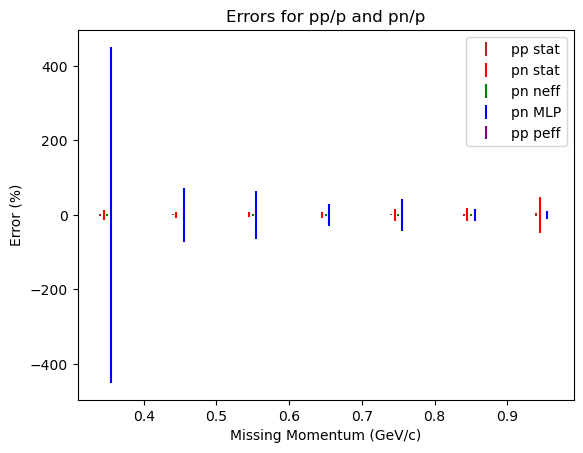

In [32]:
# pn/p and pp/p - errors
plt.errorbar(pmiss-0.010, np.zeros(sz-2), yerr=100*pp_p_err_stat/np.divide(pp,p), ls='none', ecolor='brown')
plt.errorbar(pmiss-0.005, np.zeros(sz-2), yerr=100*pn_p_err_stat/np.divide(pn,p), ls='none', ecolor='red')
plt.errorbar(pmiss+0.000, np.zeros(sz-2), yerr=100*pn_p_err_neff/np.divide(pn,p), ls='none', ecolor='green')
plt.errorbar(pmiss+0.005, np.zeros(sz-2), yerr=100*pn_p_err_mlp/np.divide(pn,p), ls='none', ecolor='blue')
plt.errorbar(pmiss+0.010, np.zeros(sz-2), yerr=100*pp_p_err_peff/np.divide(pp,p), ls='none', ecolor='purple')
#plt.ylim([-0.15, 0.15])
plt.legend(["pp stat","pn stat","pn neff","pn MLP","pp peff"])
plt.title("Errors for pp/p and pn/p")
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("Error (%)")
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pN_p_err.png")

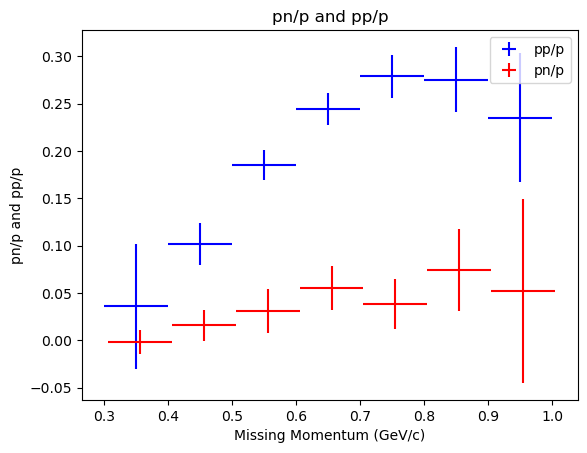

In [47]:
# pn/p and pp/p - results with errors
plt.title("pn/p and pp/p")
pp_p_err_tot = np.sqrt( np.square(pp_p_err_stat) + np.square(pp_p_err_peff) )
pn_p_err_tot = np.sqrt( np.square(pn_p_err_stat) + np.square(pn_p_err_neff) + np.square(pn_p_err_mlp) )
plt.errorbar(pmiss, np.divide(pp,p), yerr=pp_p_err_tot, xerr=0.05, ls='none', ecolor='blue')
plt.errorbar(pmiss+0.005, np.divide(pn,p), yerr=pn_p_err_tot, xerr=0.05, ls='none', ecolor='red')
#plt.errorbar(k_pn_p_x/1000, k_pn_p/100, yerr=np.stack((k_pn_p_lo,k_pn_p_hi))/100, ecolor='orange', ls='none', capsize=5)
#plt.errorbar(k_pp_p_x/1000, k_pp_p/100, yerr=np.stack((k_pp_p_lo,k_pp_p_hi))/100, ecolor='green', ls='none', capsize=5)
plt.legend(["pp/p","pn/p","pn/p (Korover 2021)","pp/p (Korover 2021)"])
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pN_p_results.png")
#plt.ylim([0,1])

# pp/(pp+pn) and pn/(pp+pn) - errors and results

/tmp/ipykernel_276334/3229711618.py:3: RuntimeWarning: invalid value encountered in sqrt
  pn_pN_err_stat = np.multiply( np.divide(pn,pp+pn), np.sqrt( np.reciprocal(pn)+np.reciprocal(pp+pn) ) )


<ErrorbarContainer object of 3 artists>

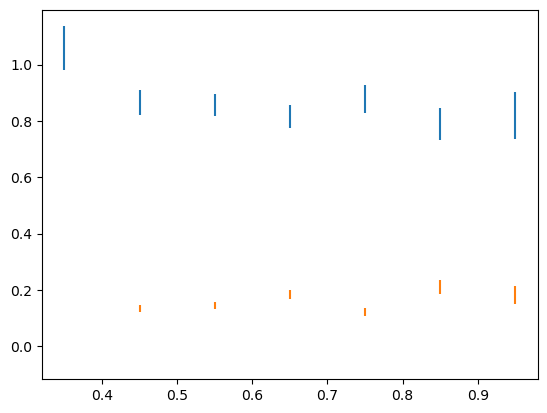

In [34]:
# statistical error
pp_pN_err_stat = np.multiply( np.divide(pp,pp+pn), np.sqrt( np.reciprocal(pp)+np.reciprocal(pp+pn) ) )
pn_pN_err_stat = np.multiply( np.divide(pn,pp+pn), np.sqrt( np.reciprocal(pn)+np.reciprocal(pp+pn) ) )

sumpppn_err_stat = np.sqrt( np.square(pp_err_stat) + np.square(pn_err_stat) )

pp_p_err_stat = np.multiply( np.divide(pp,pp+pn), np.square(np.divide(pp_err_stat,pp)) + np.square(np.divide(sumpppn_err_stat,pp+pn)) )
pn_p_err_stat = np.multiply( np.divide(pn,pp+pn), np.square(np.divide(pn_err_stat,pn)) + np.square(np.divide(sumpppn_err_stat,pp+pn)) )

plt.errorbar(pmiss, np.divide(pp,pp+pn), yerr=pp_pN_err_stat, ls='none')
plt.errorbar(pmiss, np.divide(pn,pp+pn), yerr=pn_pN_err_stat, ls='none')

[1.03564857e-03 7.80279948e-04 1.96202959e-03 2.66932750e-03
 2.93696234e-03 3.97133404e-03 3.88578059e-16]
[1.03564857e-03 7.80279948e-04 1.96202959e-03 2.66932750e-03
 2.93696234e-03 3.97133404e-03 4.44089210e-16]


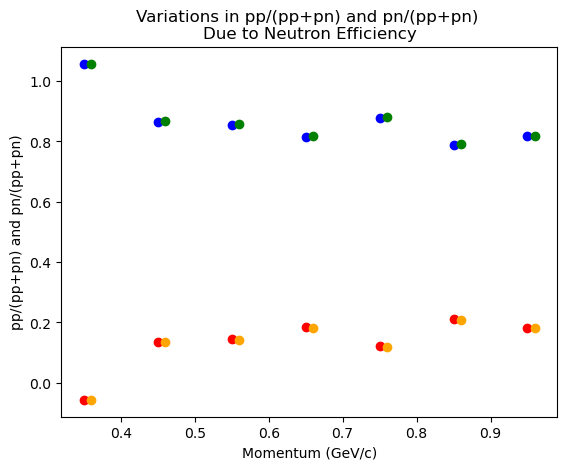

In [35]:
plt.title("Variations in pp/(pp+pn) and pn/(pp+pn) \nDue to Neutron Efficiency")
plt.scatter(pmiss, np.divide(pn,pp+pn), c='red')
plt.scatter(pmiss+0.01, np.divide(pn_altneff,pp_altneff+pn_altneff), c='orange')
plt.scatter(pmiss, np.divide(pp,pp+pn), c='blue')
plt.scatter(pmiss+0.01, np.divide(pp_altneff,pp_altneff+pn_altneff), c='green')
pn_pN_err_neff = abs( np.divide(pn,pp+pn) - np.divide(pn_altneff,pp_altneff+pn_altneff) )
pp_pN_err_neff = abs( np.divide(pp,pp+pn) - np.divide(pp_altneff,pp_altneff+pn_altneff) )
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pp/(pp+pn) and pn/(pp+pn)")
print(pn_pN_err_neff)
print(pp_pN_err_neff)

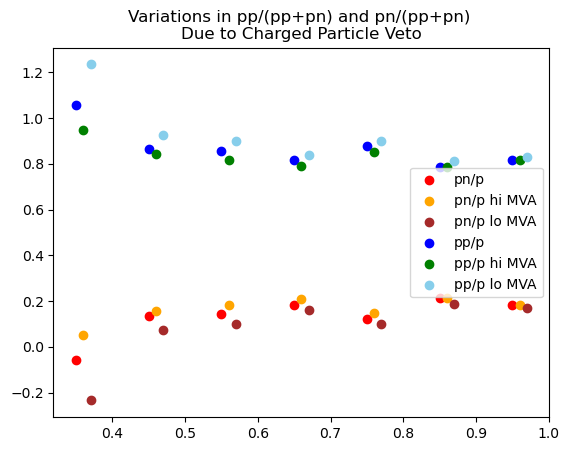

In [36]:
plt.title("Variations in pp/(pp+pn) and pn/(pp+pn) \nDue to Charged Particle Veto")
plt.scatter(pmiss, np.divide(pn,pp+pn), c='red')
plt.scatter(pmiss+0.01, np.divide(pn_hi,pp_hi+pn_hi), c='orange')
plt.scatter(pmiss+0.02, np.divide(pn_lo,pp_lo+pn_lo), c='brown')
plt.scatter(pmiss, np.divide(pp,pp+pn), c='blue')
plt.scatter(pmiss+0.01, np.divide(pp_hi,pp_hi+pn_hi), c='green')
plt.scatter(pmiss+0.02, np.divide(pp_lo,pp_lo+pn_lo), c='skyblue')
pn_pN_err_himva = abs( np.divide(pn,pp+pn) - np.divide(pn_hi,pp_hi+pn_hi) )
pp_pN_err_himva = abs( np.divide(pp,pp+pn) - np.divide(pp_hi,pp_hi+pn_hi) )
pn_pN_err_lomva = abs( np.divide(pn,pp+pn) - np.divide(pn_lo,pp_hi+pn_lo) )
pp_pN_err_lomva = abs( np.divide(pp,pp+pn) - np.divide(pp_lo,pp_hi+pn_lo) )
plt.legend(["pn/p","pn/p hi MVA","pn/p lo MVA","pp/p","pp/p hi MVA","pp/p lo MVA"])

pn_pN_err_mlp = np.maximum( pn_pN_err_himva, pn_pN_err_lomva )
pp_pN_err_mlp = np.maximum( pp_pN_err_himva, pn_pN_err_lomva )

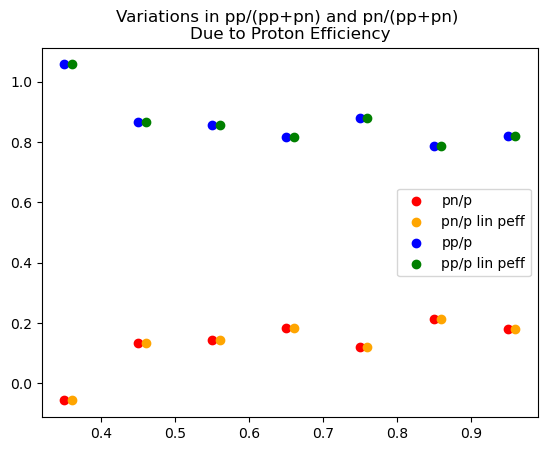

In [37]:
plt.title("Variations in pp/(pp+pn) and pn/(pp+pn) \nDue to Proton Efficiency")
plt.scatter(pmiss, np.divide(pn,pp+pn), c='red')
plt.scatter(pmiss+0.01, np.divide(pn_lin,pp_lin+pn_lin), c='orange')
plt.scatter(pmiss, np.divide(pp,pp+pn), c='blue')
plt.scatter(pmiss+0.01, np.divide(pp_lin,pp_lin+pn_lin), c='green')
pn_pN_err_peff = abs( np.divide(pn,pp+pn) - np.divide(pn_lin,pp_lin+pn_lin) )
pp_pN_err_peff = abs( np.divide(pp,pp+pn) - np.divide(pp_lin,pp_lin+pn_lin) )
plt.legend(["pn/p","pn/p lin peff","pp/p","pp/p lin peff"])

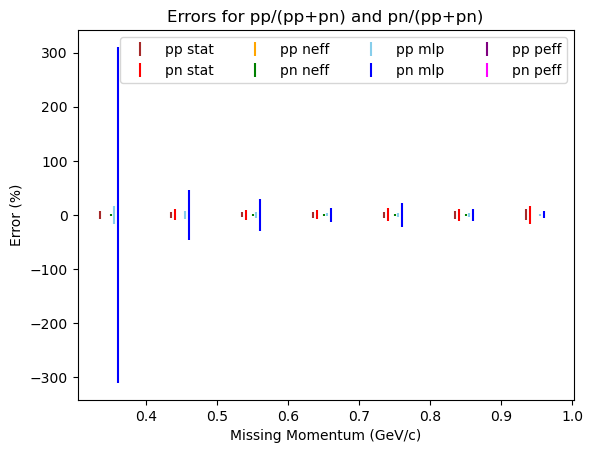

In [38]:
plt.errorbar(pmiss-0.015, np.zeros(sz-2), yerr=100*pp_pN_err_stat/np.divide(pp,pp+pn), ls='none', ecolor='brown')
plt.errorbar(pmiss-0.010, np.zeros(sz-2), yerr=100*pn_pN_err_stat/np.divide(pn,pp+pn), ls='none', ecolor='red')
plt.errorbar(pmiss-0.005, np.zeros(sz-2), yerr=100*pp_pN_err_neff/np.divide(pp,pp+pn), ls='none', ecolor='orange')
plt.errorbar(pmiss+0.000, np.zeros(sz-2), yerr=100*pn_pN_err_neff/np.divide(pn,pp+pn), ls='none', ecolor='green')
plt.errorbar(pmiss+0.005, np.zeros(sz-2), yerr=100*pp_pN_err_mlp/np.divide(pp,pp+pn), ls='none', ecolor='skyblue')
plt.errorbar(pmiss+0.010, np.zeros(sz-2), yerr=100*pn_pN_err_mlp/np.divide(pn,pp+pn), ls='none', ecolor='blue')
plt.errorbar(pmiss+0.015, np.zeros(sz-2), yerr=100*pp_pN_err_peff/np.divide(pp,pp+pn), ls='none', ecolor='purple')
plt.errorbar(pmiss+0.020, np.zeros(sz-2), yerr=100*pn_pN_err_peff/np.divide(pn,pp+pn), ls='none', ecolor='magenta')
#plt.ylim([-0.15, 0.15])
plt.legend(["pp stat","pn stat","pp neff","pn neff","pp mlp","pn mlp","pp peff","pn peff"], ncol=4)
plt.title("Errors for pp/(pp+pn) and pn/(pp+pn)")
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("Error (%)")
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pN_pN_err.png")

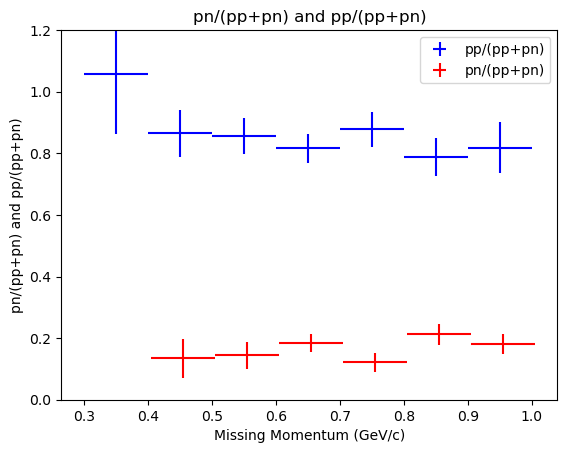

In [39]:
# pn/pN and pp/pN - results with errors
plt.title("pn/(pp+pn) and pp/(pp+pn)")
pp_pN_err_tot = np.sqrt( np.square(pp_pN_err_stat) + np.square(pp_pN_err_neff) + np.square(pp_pN_err_mlp) + np.square(pp_pN_err_peff) )
pn_pN_err_tot = np.sqrt( np.square(pn_pN_err_stat) + np.square(pn_pN_err_neff) + np.square(pn_pN_err_mlp) + np.square(pn_pN_err_peff) )
plt.errorbar(pmiss, np.divide(pp,(pp+pn)), yerr=pp_pN_err_tot, xerr=0.05, ls='none', ecolor='blue')
plt.errorbar(pmiss+0.005, np.divide(pn,pp+pn), yerr=pn_pN_err_tot, xerr=0.05, ls='none', ecolor='red')
plt.legend(["pp/(pp+pn)","pn/(pp+pn)"])
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("pn/(pp+pn) and pp/(pp+pn)")
plt.ylim([0,1.2])
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pN_pN_results.png")

# pp/2pn - errors and results

In [40]:
# statistical error
pp_pn_err_stat = np.multiply( np.divide(pp,pn), np.sqrt( np.reciprocal(pp)+np.reciprocal(pn) ) )
print(pp_pn_err_stat)

[       nan 0.65488858 0.52804162 0.37016168 0.8682931  0.44067043
 0.7953117 ]


/tmp/ipykernel_276334/1045396131.py:2: RuntimeWarning: invalid value encountered in sqrt
  pp_pn_err_stat = np.multiply( np.divide(pp,pn), np.sqrt( np.reciprocal(pp)+np.reciprocal(pn) ) )


[1.62239522e-01 2.16959281e-02 4.79624236e-02 3.99168034e-02
 1.02683742e-01 4.51128741e-02 6.21724894e-15]


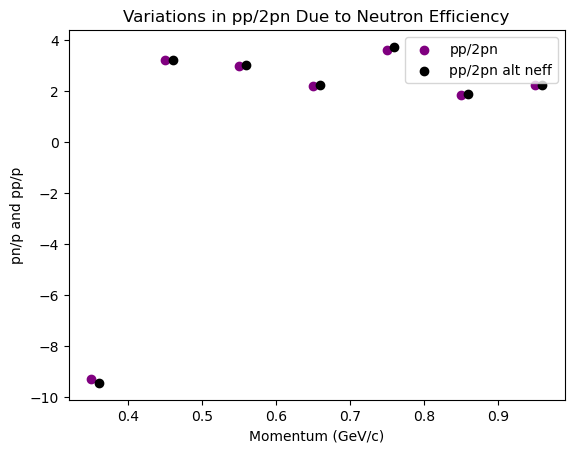

In [41]:
# pp/pn - error due to neff
plt.title("Variations in pp/2pn Due to Neutron Efficiency")
plt.scatter(pmiss, np.divide(pp,(2*pn)), c='purple')
plt.scatter(pmiss+0.01, np.divide(pp_altneff,2*pn_altneff), c='black')
plt.legend(["pp/2pn","pp/2pn alt neff"])
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
pp_pn_err_neff = abs( np.divide(pp,2*pn) - np.divide(pp_altneff,2*pn_altneff) )
print(pp_pn_err_neff)

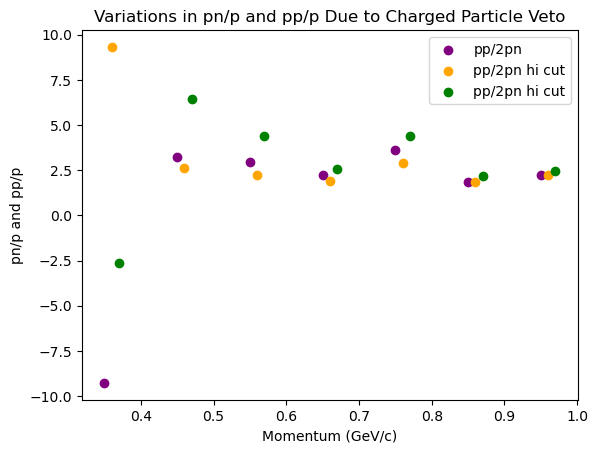

In [42]:
# pp/2pn - error due to MLP
plt.title("Variations in pn/p and pp/p Due to Charged Particle Veto")
plt.scatter(pmiss, np.divide(pp,2*pn), c='purple')
plt.scatter(pmiss+0.01, np.divide(pp_hi,2*pn_hi), c='orange')
plt.scatter(pmiss+0.02, np.divide(pp_lo,2*pn_lo), c='green')
plt.legend(["pp/2pn","pp/2pn hi cut","pp/2pn hi cut"])
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
pn_p_err_himva = abs( np.divide(pp,2*pn) - np.divide(pp_hi,2*pn_hi) )
pn_p_err_lomva = abs( np.divide(pp,2*pn) - np.divide(pp_lo,2*pn_lo) )
# find errors
pp_pn_err_mlp = np.maximum( np.divide(pp_hi,2*pn_hi)-np.divide(pp_lo,2*pn_lo), np.maximum( np.divide(pp_hi,2*pn_hi)-np.divide(pp,2*pn), np.divide(pp,2*pn)-np.divide(pp_lo,2*pn_lo) ) )

[0. 0. 0. 0. 0. 0. 0.]


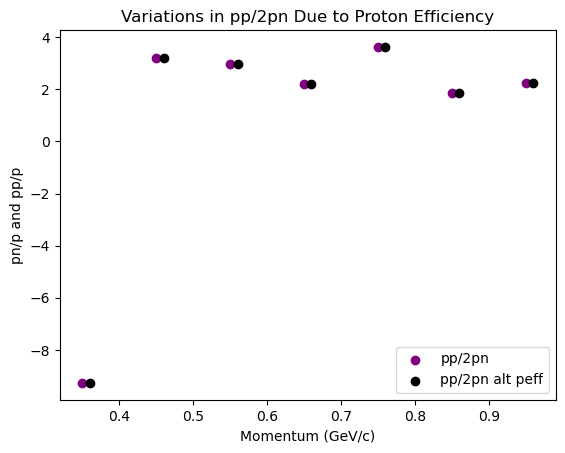

In [43]:
# pp/pn - error due to peff
plt.title("Variations in pp/2pn Due to Proton Efficiency")
plt.scatter(pmiss, np.divide(pp,(2*pn)), c='purple')
plt.scatter(pmiss+0.01, np.divide(pp_lin,2*pn_lin), c='black')
plt.legend(["pp/2pn","pp/2pn alt peff"])
plt.xlabel("Momentum (GeV/c)")
plt.ylabel("pn/p and pp/p")
pp_pn_err_peff = abs( np.divide(pp,2*pn) - np.divide(pp_lin,2*pn_lin) )
print(pp_pn_err_peff)

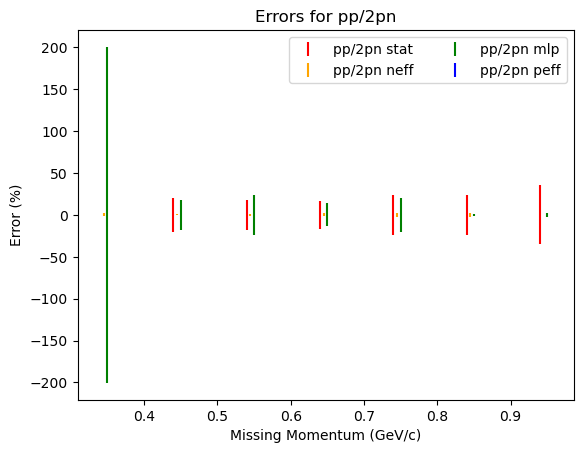

In [44]:
plt.errorbar(pmiss-0.010, np.zeros(sz-2), yerr=100*pp_pn_err_stat/np.divide(pp,2*pn), ls='none', ecolor='red')
plt.errorbar(pmiss-0.005, np.zeros(sz-2), yerr=100*pp_pn_err_neff/np.divide(pp,2*pn), ls='none', ecolor='orange')
plt.errorbar(pmiss+0.000, np.zeros(sz-2), yerr=100*pp_pn_err_mlp/np.divide(pp,2*pn), ls='none', ecolor='green')
plt.errorbar(pmiss+0.005, np.zeros(sz-2), yerr=100*pp_pn_err_peff/np.divide(pp,2*pn), ls='none', ecolor='blue')
#plt.ylim([-0.15, 0.15])
plt.legend(["pp/2pn stat","pp/2pn neff","pp/2pn mlp","pp/2pn peff"],ncol=2)
plt.title("Errors for pp/2pn")
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("Error (%)")
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pp_pn_err.png")

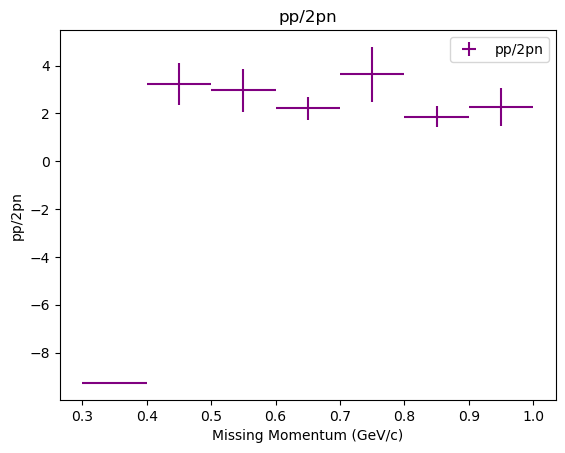

In [45]:
# pp/2pn - results with errors
plt.title("pp/2pn")
pp_pn_err_tot = np.sqrt( np.square(pp_pn_err_stat) + np.square(pp_pn_err_neff) + np.square(pp_pn_err_mlp) + np.square(pp_pn_err_peff) )
plt.errorbar(pmiss, np.divide(pp,2*pn), yerr=pp_pn_err_tot, xerr=0.05, ls='none', ecolor='purple')
plt.legend(["pp/2pn"])
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("pp/2pn")
plt.savefig("/w/hallb-scshelf2102/clas12/erins/build_rgm/Ana/tensor_to_scalar/pp_pn_results.png")

In [46]:
"""igor_pp_pn = np.array([[325.2380952380952, 1.4530892448512276],
[375.23809523809524, 2.940503432494282],
[450, 6.573226544622429],
[550, 7.974828375286041],
[650, 10.263157894736839],
[750.0000000000002, 13.352402745995427],
[900, 11.864988558352408]])
# pp/2pn - results with errors
plt.title("pp/2pn")
pp_pn_err_tot = np.sqrt( np.square(pp_pn_err_stat) + np.square(pp_pn_err_neff) + np.square(pp_pn_err_mlp) )
plt.errorbar(pmiss, np.divide(pp,2*pn), yerr=pp_pn_err_tot, xerr=0.05, ls='none', ecolor='purple')
plt.errorbar(igor_pp_pn[:,0]/1000,igor_pp_pn[:,1]/100, yerr=0.1, ls='none')
plt.legend(["Igor","Erin"])
plt.xlabel("Missing Momentum (GeV/c)")
plt.ylabel("pp/2pn")"""

'igor_pp_pn = np.array([[325.2380952380952, 1.4530892448512276],\n[375.23809523809524, 2.940503432494282],\n[450, 6.573226544622429],\n[550, 7.974828375286041],\n[650, 10.263157894736839],\n[750.0000000000002, 13.352402745995427],\n[900, 11.864988558352408]])\n# pp/2pn - results with errors\nplt.title("pp/2pn")\npp_pn_err_tot = np.sqrt( np.square(pp_pn_err_stat) + np.square(pp_pn_err_neff) + np.square(pp_pn_err_mlp) )\nplt.errorbar(pmiss, np.divide(pp,2*pn), yerr=pp_pn_err_tot, xerr=0.05, ls=\'none\', ecolor=\'purple\')\nplt.errorbar(igor_pp_pn[:,0]/1000,igor_pp_pn[:,1]/100, yerr=0.1, ls=\'none\')\nplt.legend(["Igor","Erin"])\nplt.xlabel("Missing Momentum (GeV/c)")\nplt.ylabel("pp/2pn")'

In [ ]:
from scipy.optimize import curve_fit
from statistics import variance

x = np.linspace(0.25,0.975,16)
print(x)
x2 = np.array([0,0.1,0.2])

#y = np.array([0, 0.00174409, 0.00863235, 0.2915, 0.46272, 0.513009, 0.532557, 0.522123, 0.71745, 0.564813, 0.675327, 0.709968, 0.879843, 0.911897, 0.929091, 0.810183])
y = np.array([0, 0.00057795, 0.0079913, 0.27741, 0.442953, 0.498175, 0.517183, 0.529075, 0.727019, 0.5914, 0.671163, 0.667892, 0.949981, 0.947265, 0.942864, 0.927541])
degree = 2
coeff = np.polyfit(x,y,degree)
print(coeff)
#chisq_dof = residuals / (len(x) - degree)
#print(chisq_dof)
p = np.poly1d( np.polyfit(x,y,degree) )
plt.plot(x, y, 'o', x, 1.1*p(x), '-')
plt.title("Proton Efficiency with Quadratic Fit")
plt.xlabel("Proton Momentum (GeV/c)")
plt.ylabel("Efficiency")
plt.savefig("peff_quad.png")
#plt.plot(x, coeff[2]*np.square(y)*coeff[1]*y-coeff[0])

chisq = (np.sum( y - ( coeff[0]*np.square(x) + coeff[1]*x + coeff[2] ))**2) / variance(y)
print(coeff[0]*np.square(x) + coeff[1]*x + coeff[2] )
print(chisq)

In [ ]:
degree=1
p = np.poly1d( np.polyfit(x,y,degree) )
coeff = np.polyfit(x,y,degree)
print(coeff)
plt.plot(x, y, 'o', x, p(x), '-')
plt.title("Proton Efficiency with Linear Fit")
plt.xlabel("Proton Momentum (GeV/c)")
plt.ylabel("Efficiency")
plt.savefig("peff_linear.png")

chisq = (np.sum( y - ( coeff[0]*x + coeff[1] ))**2) / variance(y)
print( coeff[0]*x + coeff[1] )
print(chisq)